# Turn truth tables into degenerate graphs and visualize those graphs

## Imports

In [1]:
%load_ext lab_black
# python internal
# import collections
# import copy
# import gc
# from glob import glob
# import h5py
# import itertools
# import os
# import random
# import re
# import socket
# import shutil
# import subprocess
# import sys

# conda/pip
# import dask
# import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import networkx as nx

# from tqdm import tqdm

## Truth Tables / Gates

### $A \land B$ gate

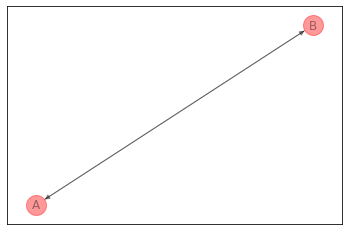

In [2]:
gate_states = [
    # A B
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
]

truth_vector = np.array([0, 0, 0, 1])


and_edges = [("A", "B"), ("B", "A")]
AND_gate = nx.MultiDiGraph()
AND_gate.add_edges_from(and_edges)

options = {"node_color": "red", "node_size": 400, "alpha": 0.4}
nx.draw_networkx(AND_gate, with_labels=True, **options)

### $A \lor B$ gate

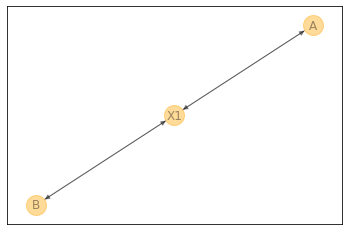

In [3]:
gate_states = [
    # A B
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
]

truth_vector = np.array([0, 1, 1, 1])

or_edges = [
    ("A", "X1"),
    ("B", "X1"),
    ("X1", "A"),
    ("X1", "B"),
]
OR_gate = nx.MultiDiGraph()
OR_gate.add_edges_from(or_edges)

options = {"node_color": "orange", "node_size": 400, "alpha": 0.4}
nx.draw_networkx(OR_gate, nx.spring_layout(OR_gate), with_labels=True, **options)

Aside: Below three-component gate graphs are only one of many possible degenerate graph solutions, work in progress. weights can be added as edge components to list as well

### $(A \land B) \lor C$ gate

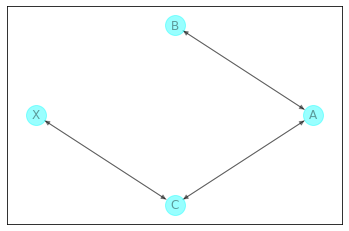

In [4]:
gate_states = [
    # A B C
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
]

truth_vector = np.array([0, 0, 0, 1, 1, 1, 1, 1])

ANDOR_gate = nx.MultiDiGraph()
ANDOR_gate.add_edges_from(and_edges + [("X", "C"), ("C", "X"), ("A", "C"), ("C", "A")])

options = {"node_color": "cyan", "node_size": 400, "alpha": 0.4}
nx.draw_networkx(
    ANDOR_gate, nx.circular_layout(ANDOR_gate), with_labels=True, **options
)

### $(A \land B) \land \lnot C$ gate

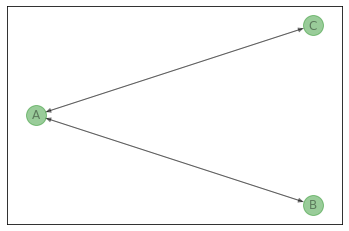

In [5]:
gate_states = [
    # A B C
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
]

truth_vector = np.array([0, 0, 0, 0, 1, 0, 0, 0])

# Here we can downstream implement subgraph search heuristics to pick edge weight of A-C >> A-B

ANDOR_gate = nx.MultiDiGraph()
ANDOR_gate.add_edges_from(and_edges + [("A", "C"), ("C", "A")])

options = {"node_color": "green", "node_size": 400, "alpha": 0.4}
nx.draw_networkx(ANDOR_gate, nx.shell_layout(ANDOR_gate), with_labels=True, **options)

### $(A \lor B) \land C$ gate

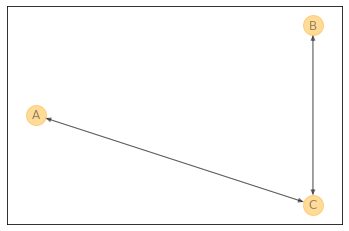

In [6]:
gate_states = [
    # A B C
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
]

truth_vector = np.array([0, 0, 0, 0, 0, 1, 1, 1])


# NOTE this is only one of many possible degenerate graphs, still working on this part. weights can be added as edge components to list as well.
# Is same as basic OR gate in this case to enforce the ^ C component for expression

or_and_edges = or_edges

ORAND_gate = nx.MultiDiGraph()
# simply relabel OR gate
ORAND_gate.add_edges_from(or_edges)
mapping = {"X1": "C"}
ORAND_gate = nx.relabel_nodes(ORAND_gate, mapping)
options = {"node_color": "orange", "node_size": 400, "alpha": 0.4}
nx.draw_networkx(ORAND_gate, nx.shell_layout(ORAND_gate), with_labels=True, **options)